A simple application of regression using a dataset of Extensometer data

**Import Necessary Libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import pandas as pd
import seaborn as sns

**Loading CSV and analyzing data**

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.describe()

,Load,Actuator,Time,Extensometer
count,7368.000000,7368.000000,7368.000000,7368.000000
mean,129.573679,19.676954,122.940885,0.321692
std,30.083359,12.201710,71.024682,1.288631
min,-2.500420,0.000000,0.101000,-3.584050
25%,105.477175,7.770834,61.486500,0.037853
50%,139.309250,17.447915,122.869000,0.045967
75%,155.505900,30.342015,184.266500,0.368152
max,159.368800,44.465280,251.531000,21.131935


In [4]:
data.shape

(7368, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7368 entries, 0 to 7367
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Load          7368 non-null   float64
 1   Actuator      7368 non-null   float64
 2   Time          7368 non-null   float64
 3   Extensometer  7368 non-null   float64
dtypes: float64(4)
memory usage: 230.4 KB


Here we have described the data and gotten more information about it.

**Using Data plots to visualize data**

We use histogram plot to check each column of data

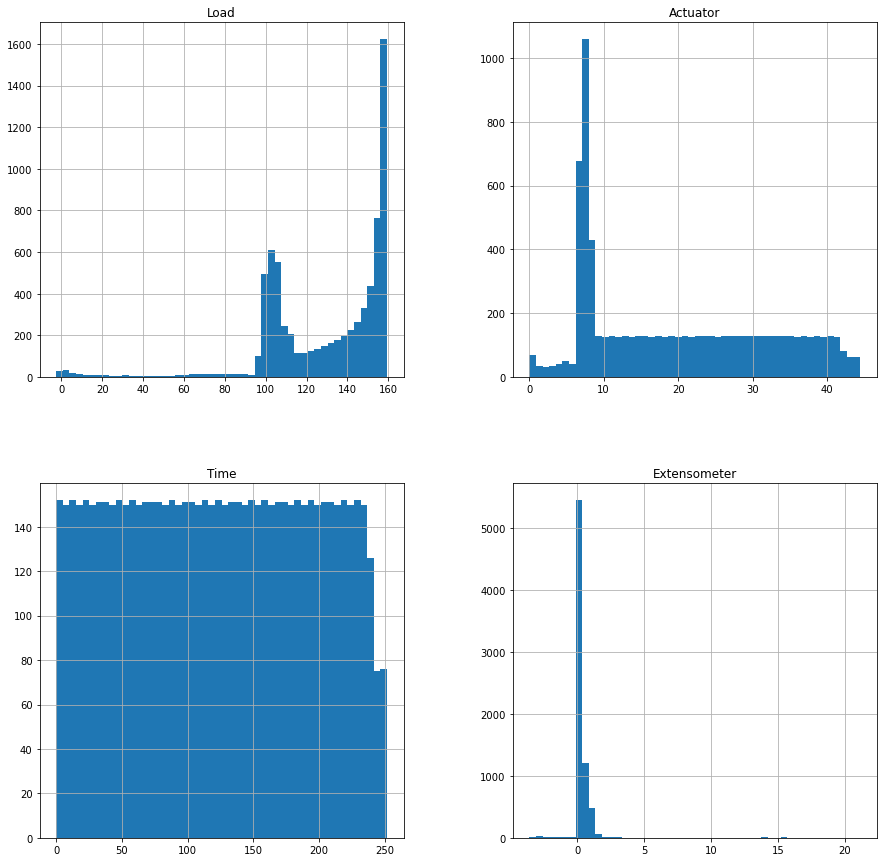

In [8]:
data.hist(bins=50,figsize=(15,15))
plt.show()

This gives us pairwise relationships in a dataset and it helps determine the dependent and independent variables

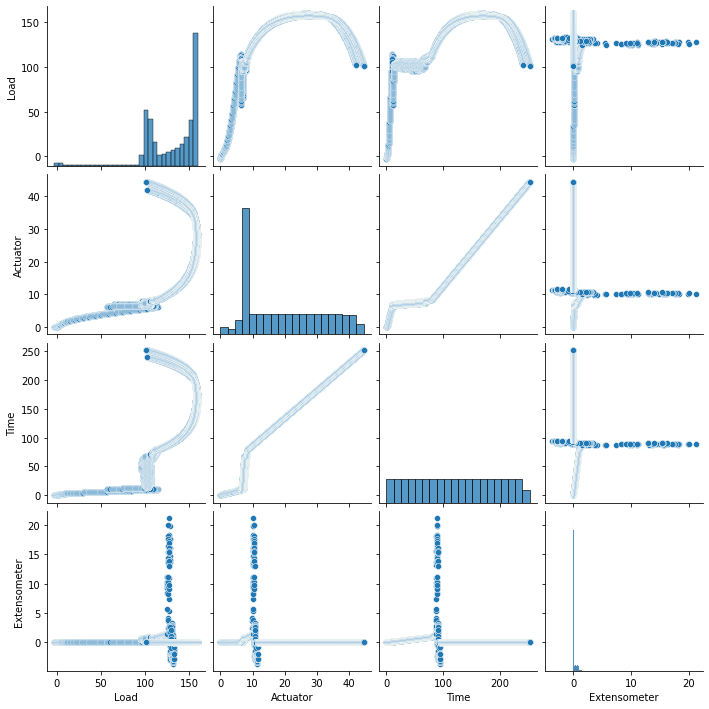

In [15]:
sns.pairplot(data)

For increase in time and load for a particular actuator, there are changes in results as seen in the graph. 

**Correlation Analysis**

In [18]:
data.corr()

,Load,Actuator,Time,Extensometer
Load,1.000000,0.600831,0.683965,-0.112439
Actuator,0.600831,1.000000,0.979212,-0.195955
Time,0.683965,0.979212,1.000000,-0.162852
Extensometer,-0.112439,-0.195955,-0.162852,1.000000


Thus the independent variable is the Extensometer. Load, Time and Actuator are dependent variables. We can view values of matrix in the heatmap

<AxesSubplot:>

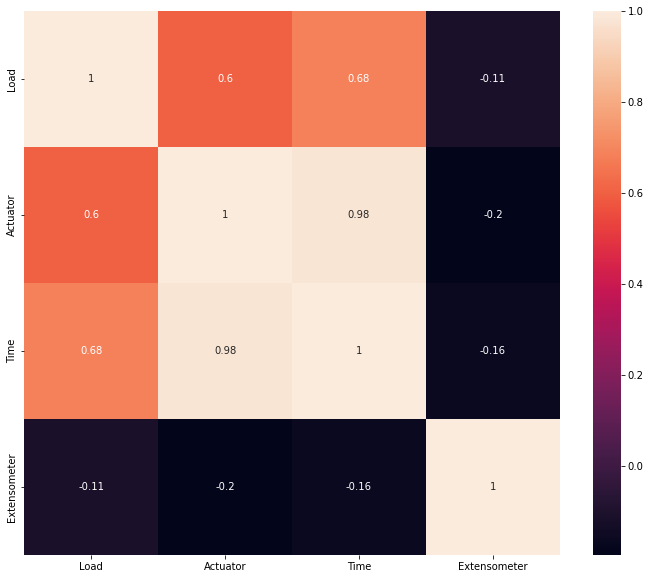

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

**Split the data into the 80/20 ratio through scaling**

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()
trans=scaler.fit_transform(data.drop(columns=['Extensometer']))

In [37]:
trans=pd.DataFrame(trans,columns=data.columns[:-1])
trans

,Load,Actuator,Time
0,0.003707,0.000000,0.000000
1,0.003677,0.000156,0.000266
2,0.004008,0.000156,0.000529
3,0.005630,0.000156,0.000795
4,0.007009,0.000312,0.001062
...,...,...,...
7363,0.645427,0.998594,0.998938
7364,0.644464,0.998907,0.999205
7365,0.643242,0.999219,0.999467
7366,0.640943,0.999688,0.999734


Appropriate variables selected are the Load, Time and Actuator variables.

**Regression Analysis**

Multiple Regression is used as we're dealing with categorical data

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
lr=LinearRegression()
X=trans[['Load','Time','Actuator']]
y=data['Extensometer']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

Results of y in the form of an array

In [43]:
y_prediction =  lr.predict(x_test)
y_prediction

array([ 0.1901043 ,  0.80348544, -0.04872844, ...,  0.45823324,
        0.11977707,  0.0707057 ])

**Calculating Metrics**

In [44]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print("R2:",metrics.r2_score(y_train,predictions))

MAE: 0.3287391160848147
MSE: 1.4293407856618139
RMSE: 1.195550411175461
R2: 0.07385724255804682


In [50]:
R2 = metrics.r2_score(y_test, y_prediction)

In [52]:
n = data.shape[0] 
p = X.shape[1] 
adj_R2 = (1-R2)*(n-1)/(n-p-1)
print("Adjusted R2:",adj_R2)

Adjusted R2: 0.9487901471080958


This shows that we've chosen a good model as the R2 score is high

**Tabluation of results**

In [54]:
from tabulate import tabulate

In [56]:
table = [["MAE",0.3287391160848147],["MSE",1.4293407856618139],
...          ["RMSE",],["RMSE",1.195550411175461],["R2",0.07385724255804682],["Adjusted R2",0.9487901471080958]]
print(tabulate(table))

-----------  ---------
MAE          0.328739
MSE          1.42934
RMSE
RMSE         1.19555
R2           0.0738572
Adjusted R2  0.94879
-----------  ---------


**Regression Equation**

In [69]:
pd.DataFrame(lr.coef_, x.columns, columns=["Coeff."])

,Coeff.
Load,-1.049198
Time,4.843587
Extensometer,-5.378114


In [70]:
lr.intercept_

1.1930056834289153

*Obtained regression Equation*

-1.049198 * Load + 4.843587 * Time + -5.378114 *Extensometer + 1.1930056834289153
